In [1]:
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt
import open3d as o3d
from scipy.stats import chisquare
import pandas as pd

basedir = os.path.dirname(os.getcwd())
_py = os.path.join(basedir, 'py')
_data = os.path.join(basedir, 'data')
_images = os.path.join(basedir, 'images')

sys.path.insert(1, _py)
import lad
import figures

from dotenv import load_dotenv
load_dotenv()

%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2021-09-10 16:53:03,364 - utils - NumExpr defaulting to 4 threads.


## Inputs


Option: not norms averaged...
voxel_size_w 0.0001 DONE...
Option: not norms averaged...
voxel_size_w 0.001 DONE...
Option: not norms averaged...
voxel_size_w 0.01 DONE...
Option: not norms averaged...
voxel_size_w 0.1 DONE...
Option: not norms averaged...
voxel_size_w 1 DONE...
voxel_size_w BESTFIT:	 0.1
Option: not norms averaged...
kd3_sr 0.001 DONE...
Option: not norms averaged...
kd3_sr 0.01 DONE...
Option: not norms averaged...
kd3_sr 0.1 DONE...
Option: not norms averaged...
kd3_sr 1.0 DONE...
kd3_sr BESTFIT:	 1.0
Option: not norms averaged...
max_nn 3 DONE...
Option: not norms averaged...
max_nn 5 DONE...
Option: not norms averaged...
max_nn 10 DONE...
Option: not norms averaged...
max_nn 20 DONE...
Option: not norms averaged...
max_nn 50 DONE...
Option: not norms averaged...
max_nn 100 DONE...
max_nn BESTFIT:	 3


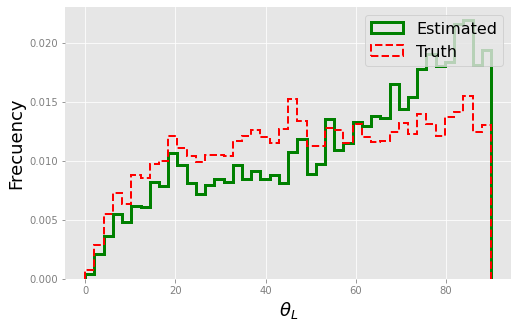

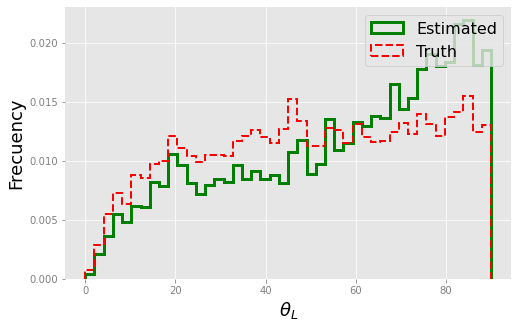

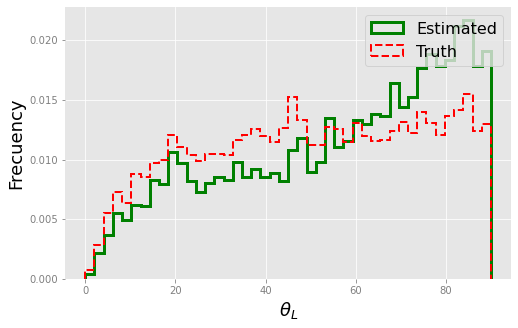

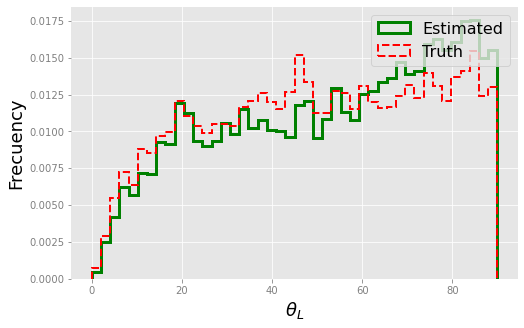

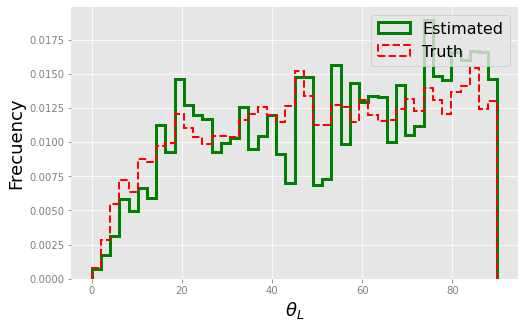

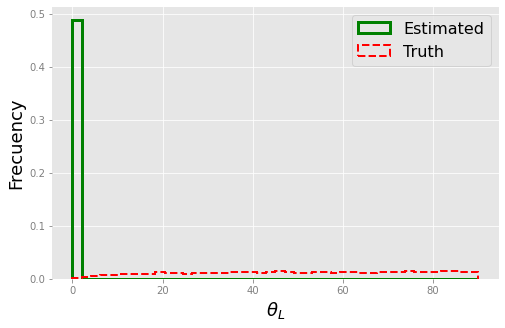

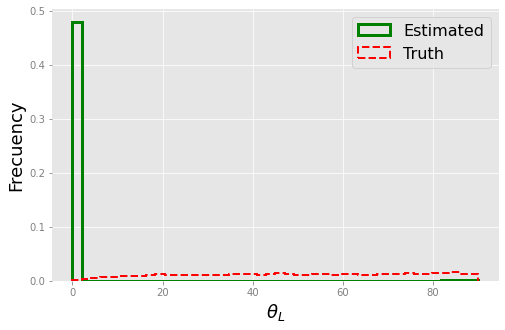

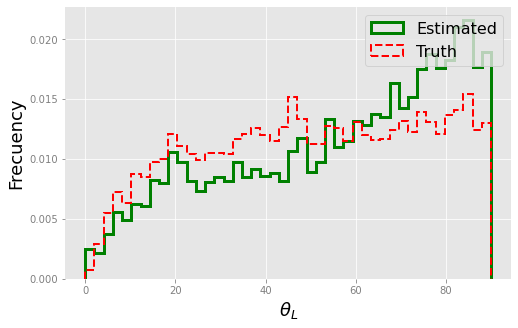

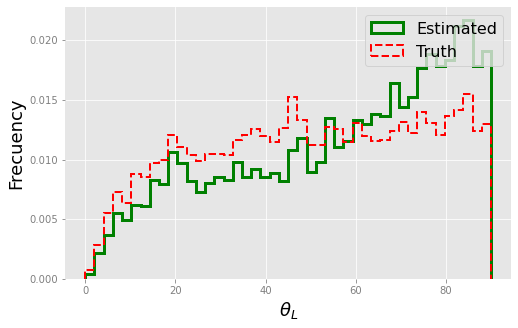

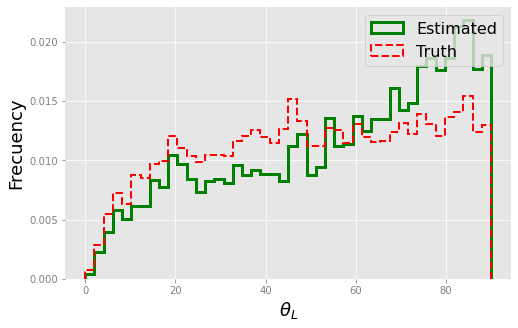

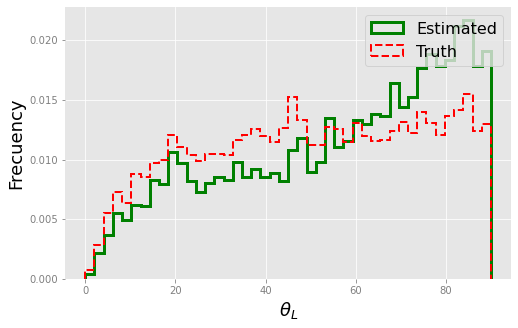

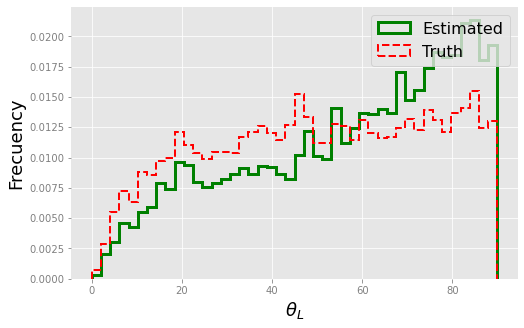

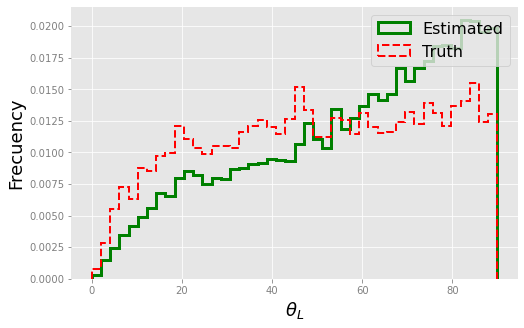

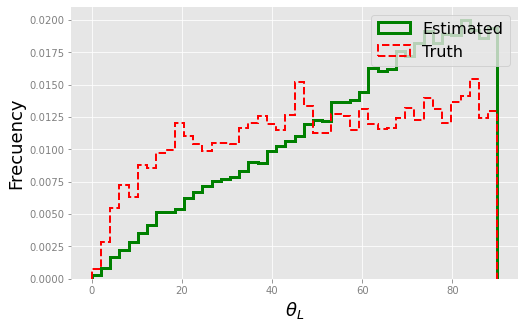

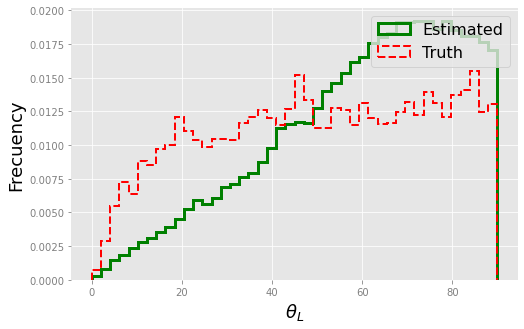

In [134]:

mockname = 'single'
res = bestfit_pars_la(mockname, norm_avg=False, downsample=False, weigths=True)

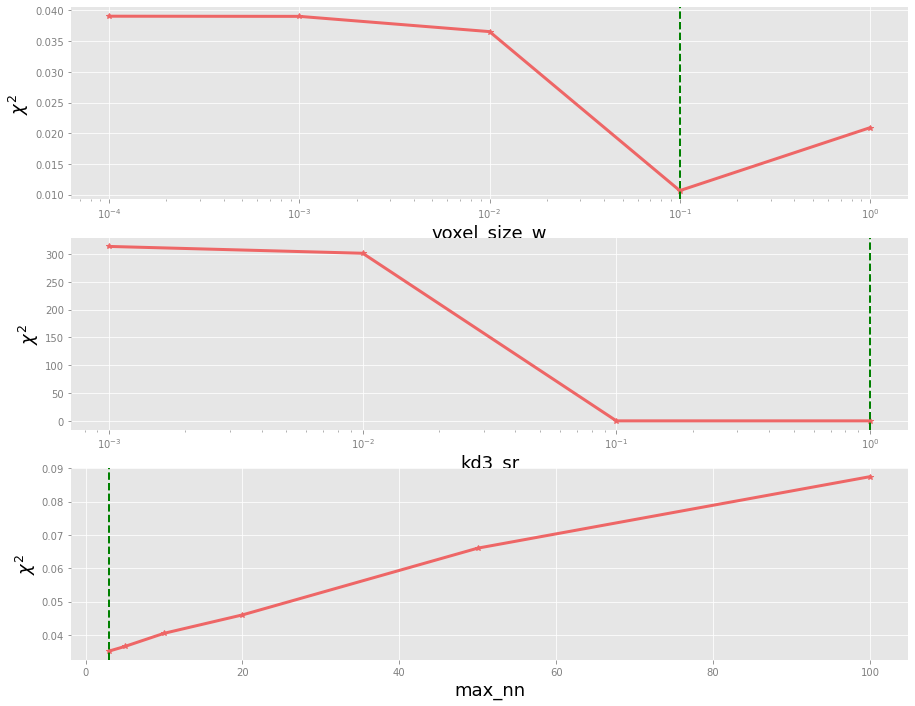

In [135]:
best_fit_pars_plot(res, mockname, savefig=None, norm_avg=False, downsample=False, weigths=True)

Best-fits:
 leaf size=0.04 
 voxel_size_w=0.1000 
 kd3_sr=1.0000 
 max_nn=3.0000 
Option: not norms averaged...
['tree_0', 0.007741734822777787, 1.0]


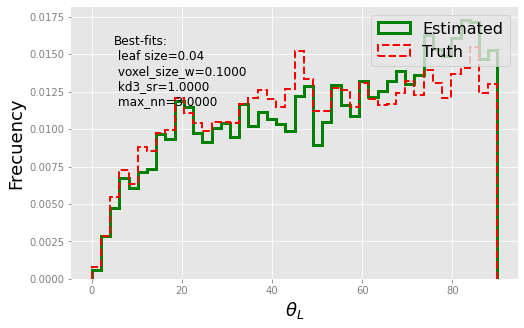

In [136]:
text = 'Best-fits:\n leaf size=%.2f \n %s=%.4f \n %s=%.4f \n %s=%.4f ' %(res['leafsize'], 'voxel_size_w', res['voxel_size_w_bestfit'],'kd3_sr', res['kd3_sr_bestfit'],'max_nn', res['max_nn_bestfit'])
print(text)
mockname = 'single'

chis2 = test_leaf_angle(mockname,  0, 
                                   res['voxel_size_w_bestfit'], 
                                   res['kd3_sr_bestfit'], 
                                   res['max_nn_bestfit'], debug=True, text=text,
                                   norm_avg=False, downsample=True,
                                   weigths=True)

print(chis2)

leaf size=0.04 
 voxel_size_w=0.1000 
 kd3_sr=1.0000 
 max_nn=3.0000 
Option: not norms averaged...
['tree_0', 0.007741734822777787, 1.0]


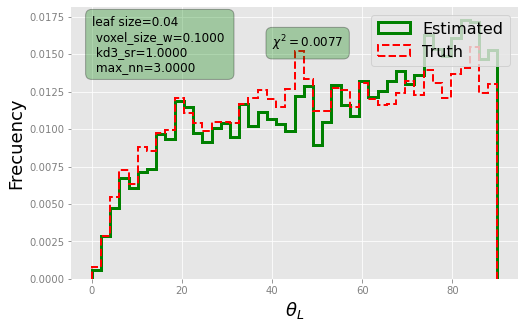

In [34]:
# load bestfit results
mockname = 'single'
resdir_name = '%s_%s' %('results', mockname)
bestfit_file = os.path.join(_data, mockname, resdir_name, 'bestfit.npy')
res = np.load(bestfit_file, allow_pickle=True)
res = res.tolist()

text = 'leaf area=%.2f \n %s=%.4f \n %s=%.4f \n %s=%.4f ' %(res['leafsize'], 'voxel_size_w', res['voxel_size_w_bestfit'],'kd3_sr', res['kd3_sr_bestfit'],'max_nn', res['max_nn_bestfit'])
print(text)

chis2 = lad.test_leaf_angle(mockname,  0, res['voxel_size_w_bestfit'], 
res['kd3_sr_bestfit'], res['max_nn_bestfit'], debug=True, text=text, 
norm_avg=False, downsample=False, weigths=True)

print(chis2)

leaf size=0.04 
 voxel_size_w=0.1000 
 kd3_sr=1.0000 
 max_nn=3.0000 
Option: not norms averaged...
['tree_0', 0.007741734822785761, 1.0]


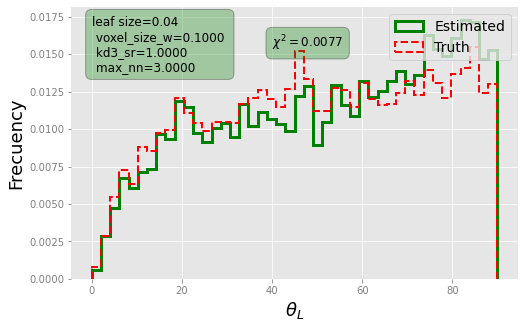

In [35]:
# load bestfit results
mockname = 'single'
resdir_name = '%s_%s' %('results', mockname)
bestfit_file = os.path.join(_data, mockname, resdir_name, 'bestfit.npy')
res = np.load(bestfit_file, allow_pickle=True)
res = res.tolist()

text = 'leaf size=%.2f \n %s=%.4f \n %s=%.4f \n %s=%.4f ' %(res['leafsize'], 'voxel_size_w', res['voxel_size_w_bestfit'],'kd3_sr', res['kd3_sr_bestfit'],'max_nn', res['max_nn_bestfit'])
print(text)

chis2 = lad.test_leaf_angle(mockname,  0, res['voxel_size_w_bestfit'], 
res['kd3_sr_bestfit'], res['max_nn_bestfit'], debug=True, text=text, 
norm_avg=False, downsample=False, weigths=True)

print(chis2)

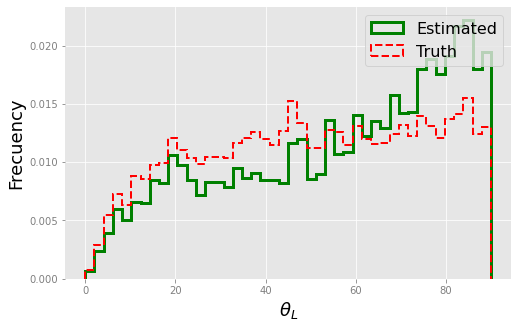

In [6]:
# text = 'Best-fits:\n leaf size=%.2f \n %s=%.4f \n %s=%.4f \n %s=%.4f ' %(res['leafsize'], 'voxel_size_la', res['voxel_size_la_bestfit'],'kd3_sr', res['kd3_sr_bestfit'],'max_nn', res['max_nn_bestfit'])
# print(text)
mockname = 'single'

chis2 = test_leaf_angle(mockname,  0.01, 
                                   0.05, 
                                   5, debug=True, text=None,
                                   norm_avg=False, downsample=False)

Option: not norms averaged...
['tree_0', 0.010673349207052173, 1.0]


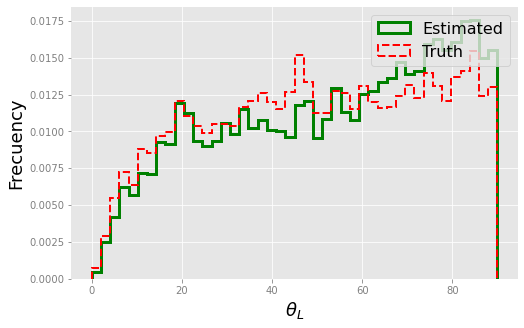

In [131]:
# text = 'Best-fits:\n leaf size=%.2f \n %s=%.4f \n %s=%.4f \n %s=%.4f ' %(res['leafsize'], 'voxel_size_la', res['voxel_size_la_bestfit'],'kd3_sr', res['kd3_sr_bestfit'],'max_nn', res['max_nn_bestfit'])
# print(text)
mockname = 'single'

chis2 = test_leaf_angle(mockname,  1,
                                   0.1,
                                   0.5, 
                                   5, debug=True, text=None,
                                   norm_avg=False, downsample=False,
                                   weigths=True)
print(chis2)

Best-fits:
 leaf size=0.00 
 voxel_size_la=0.0050 
 kd3_sr=0.1000 
 max_nn=50.0000 
Option: not norms averaged...


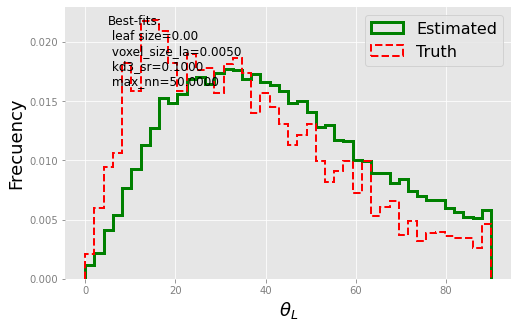

In [28]:
text = 'Best-fits:\n leaf size=%.2f \n %s=%.4f \n %s=%.4f \n %s=%.4f ' %(res['leafsize'], 'voxel_size_la', res['voxel_size_la_bestfit'],'kd3_sr', res['kd3_sr_bestfit'],'max_nn', res['max_nn_bestfit'])
print(text)

chis2 = test_leaf_angle(mockname,  res['voxel_size_la_bestfit'], 
                                   res['kd3_sr_bestfit'], 
                                   res['max_nn_bestfit'], debug=True, text=text,
                                   norm_avg=False)

In [114]:
mockname = 'single'
mockdir = os.path.join(_data, mockname)
segtrees_dir_name = 'toy_trees'
segtrees_dir = os.path.join(mockdir, segtrees_dir_name)
segtrees_files = glob.glob(os.path.join(segtrees_dir, 'tree_*.npy'))
file = segtrees_files[0]

debug=True
kd3_sr, max_nn = 0.5, 5

# Tree name
treename = file.split('/')[-1].split('.')[0]
# load segmented tree (foliage only) data
tree = np.load(file)
if debug:
    tree = tree[::15]
# Extract x,y, and z coordinates of foliage point cloud (fpc)
points = tree.T[5:8].T
normals = lad.get_normals(points, kd3_sr, max_nn, show=False, downsample=False)


In [115]:
voxel_size = 0.5

pcd = lad.points2pcd(points)
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, voxel_size)
voxel = []

for point in points:

    i,j,k = voxel_grid.get_voxel(point)
    voxel.append('%s_%s_%s' %(i,j,k))

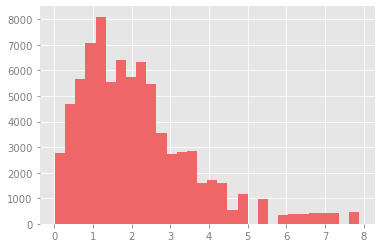

In [119]:
vox, idx, idxinv, counts = np.unique(np.array(voxel), return_index=True, return_inverse=True, return_counts=True)
volume = voxel_size**3
density = counts/volume
mean_density = np.mean(density)
w = density / mean_density
ws = w[idxinv]

plt.hist(ws, bins=30)
plt.show()

In [ ]:
for normal in normals:

    ang = lad.vecttoangle([0, 0, 1], -normal)

In [59]:
print(normals.shape)
print(idx.shape, idx)
print(idxinv.shape, idxinv)
print(w.shape)

# ws = np.zeros(points.shape[0], dtype='float')
ws = w[idxinv]
print(w[idxinv].shape, w[idxinv])

(80161, 3)
(1325,) [19803 70250 49124 ... 24286 15232  5031]
(80161,) [683 682 683 ... 671 673 682]
(1325,)
(80161,) [1.33886803 3.5041978  1.33886803 ... 0.54546475 0.13223388 3.5041978 ]


In [111]:
keep = idxinv == 683
where = np.where(keep)
print(where)

(array([    0,     2,     3,     4,     7,     8, 10055, 10065, 10076,
       10086, 10115, 10158, 10170, 10219, 10258, 10272, 10287, 10316,
       10361, 29105, 29230, 29248, 29266, 29301, 29336, 29478, 29514,
       34193, 34290, 34918, 34967, 34990, 35012, 35033, 35054, 35075,
       35096, 35118, 35138, 35176, 35195, 35215, 35235, 35258, 35281,
       35303, 35327, 40199, 40207, 40230, 40237, 40241, 40244, 40245,
       40249, 40253, 40261, 40265, 40281, 40286, 40291, 40328, 40342,
       54984, 54985, 55005, 55006, 55027, 55028, 55050, 55051, 55072,
       55093, 55094, 55115, 55137, 55159, 55515, 55592, 70087, 80145]),)


In [113]:
print(counts[683])
print(w[683])
print(ws[where].shape, ws[where])
# keep = ws == w[683]
# print(keep.sum(), ws[keep])

81
1.3388680280934617
567 [1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803 1.33886803
 1.33886803 1.33886803 1.33886803 1.

In [109]:
ind = 3
p = points[ind]
i,j,k = voxel_grid.get_voxel(p)
print(ind, p)
print(i,j,k)

keep = vox == '%s_%s_%s' %(i,j,k)
idxvox = np.where(keep)[0][0]
print(idxvox, counts[idxvox])

keep = idxinv == idxvox
# print(np.where(keep))
# print(w[keep], ws[ind])
invox = []
for p in points[keep]:
    i,j,k = voxel_grid.get_voxel(p)
    invox.append('%s_%s_%s' %(i,j,k))
print(set(invox), len(invox))
# print(keep[:10])
# print(np.where(keep))
print(len(ws[keep]), set(ws[keep]))

3 [ 4.30327463 -0.35270858  7.81456041]
18 9 8
683 81
{'18_9_8'} 81
81 {1.3388680280934617}


In [96]:
points[29000]

array([ 2.07266164, -1.40015507,  8.4459753 ])

In [15]:
# get true leag-angle-distribution
file = "../data/spherical_02/mesh.ply"
mesh = o3d.io.read_triangle_mesh(file)
# 
mesh.compute_triangle_normals()
mesh.compute_vertex_normals()
# print(mesh.cluster_connected_triangles())
# print("Computing normal and rendering it.")
# 
print(np.asarray(mesh.triangle_normals))
print(np.asarray(mesh.triangles))
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)


[[ 0.60652789  0.76233696  0.22575712]
 [ 0.60652519  0.76234     0.22575411]
 [ 0.60652677  0.76233873  0.22575414]
 ...
 [-0.82444591 -0.1850895   0.53481849]
 [-0.82444614 -0.18508886  0.53481836]
 [-0.82443661 -0.18509855  0.5348297 ]]
[[    0     1     2]
 [    0     2     3]
 [    4     5     6]
 ...
 [30012 30014 30015]
 [30016 30017 30018]
 [30016 30018 30019]]


In [45]:
tnorm = np.asarray(mesh.triangle_normals)
t = np.asarray(mesh.triangles)
true_angs = []

for vect in tnorm:

    true_angs.append(lad.vecttoangle([0, 0, 1], vect))


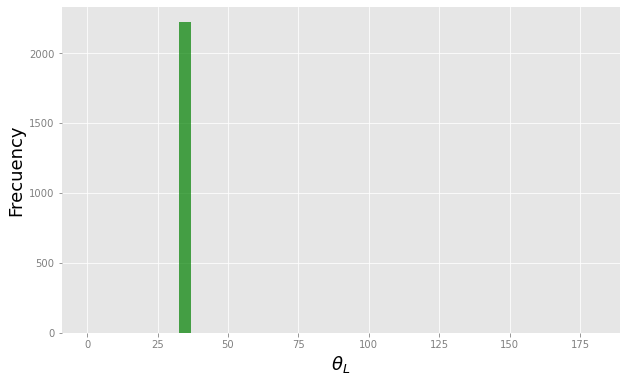

In [51]:
figures.angs_dist(true_angs, savefig=None)